In [1]:
# Load in necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
df = pd.read_csv('../NRSDP_Results.csv')
df.head(10)

,Name,SASA,SASA_Polar,Charge,Mass,Radius of Gyration,% Helix,% Strand,SESA,SASAH,Fractal Dimension,Volume,Sphericity,Arithmetic Roughness,Root Mean Square Roughness,Skewness,Kurtosis
0,d1a34a_.pdb,9695.13,5257.82,4,16178.19922,20.537088,0.000000,40.136054,7810.820,0.542316,2.192476,36283.170230,0.678564,5.708369,6.897996,0.072461,0.220568
1,d1a3wa3.pdb,7806.35,4231.17,5,14657.69906,14.394010,35.074627,19.402985,6454.104,0.542016,2.266614,12492.057440,0.403401,6.881226,8.208693,0.071503,0.218150
2,d1a6qa1.pdb,4779.70,2817.96,-2,7573.65934,12.399524,64.705882,0.000000,3752.021,0.589568,2.129115,7985.527729,0.514938,4.972095,5.707285,0.020803,0.130187
3,d1a9xb1.pdb,7556.99,3863.38,-4,16227.00856,14.546234,23.178808,28.476821,6488.735,0.511233,2.275076,12892.594690,0.409780,7.454736,8.604815,0.017269,0.127534
4,d1ab8a_.pdb,9712.93,5748.80,-7,19284.88896,16.896517,38.418079,27.118644,8056.869,0.591871,2.220020,20205.991350,0.445285,6.597417,7.843940,0.076282,0.223015
5,d1abva_.pdb,6277.57,3565.01,-10,11571.87930,13.256195,80.952381,0.000000,5209.924,0.567896,2.248067,9757.650713,0.423854,5.868117,6.769638,0.013808,0.134501
6,d1amxa_.pdb,7528.41,3831.68,-4,17076.44886,15.389958,8.666667,51.333333,6503.730,0.508963,2.297915,15268.660740,0.457638,6.746007,7.931083,0.049343,0.177913
7,d1asua_.pdb,9987.57,5564.52,8,17876.34644,17.202963,37.037037,16.666667,8093.231,0.557145,2.189813,21325.457930,0.459509,6.459909,7.692188,0.069865,0.233366
8,d1auyb_.pdb,10468.67,6500.08,-4,20126.08342,18.109825,3.703704,41.798942,8827.813,0.620908,2.210711,24878.911770,0.466858,7.349771,8.708865,0.155720,0.419140
9,d1b3ta_.pdb,9495.55,5459.96,4,15992.36156,16.435423,30.612245,25.850340,7679.941,0.575002,2.190781,18596.501920,0.441991,7.559135,9.000479,0.069843,0.202663


In [4]:
# Categorization based on given conditions
sorted_data = df.sort_values(by=["Charge", "Radius of Gyration", "SASAH", "Arithmetic Roughness"])
sorted_data = sorted_data.reset_index()
sorted_data.head(10)

,index,Name,SASA,SASA_Polar,Charge,Mass,Radius of Gyration,% Helix,% Strand,SESA,SASAH,Fractal Dimension,Volume,Sphericity,Arithmetic Roughness,Root Mean Square Roughness,Skewness,Kurtosis
0,48,d1exra_.pdb,9805.75,5379.75,-25,16430.83966,21.653864,64.383562,2.739726,7980.889,0.548632,2.168847,42529.94471,0.738294,5.677803,6.724776,0.042313,0.173869
1,297,d1xm5a_.pdb,8157.01,4344.39,-23,17099.88296,14.944418,48.026316,19.736842,6782.794,0.532596,2.263009,13980.59402,0.413770,7.942470,9.294025,0.034762,0.151587
2,227,d1s7za_.pdb,7029.59,3380.18,-23,12675.86896,15.297370,66.037736,0.000000,5726.370,0.480850,2.195297,14994.73929,0.513528,5.398744,6.387433,0.038700,0.154607
3,480,d3b1da_.pdb,16735.79,8866.24,-21,44166.33450,20.922182,40.826873,16.537468,15465.216,0.529777,2.477601,38362.73320,0.355687,9.459467,10.835905,-0.000814,0.107652
4,385,d2gtlo1.pdb,7134.16,3769.69,-20,13689.75358,14.350613,0.000000,59.016393,6067.871,0.528400,2.262616,12379.40966,0.426495,6.922170,8.011754,0.022665,0.132409
5,81,d1h1ib_.pdb,14070.80,7414.78,-19,37499.50458,19.334717,6.936416,39.884393,13297.415,0.526962,2.475413,30276.24806,0.353279,9.020535,10.384017,0.006555,0.122781
6,151,d1lucb_.pdb,14271.26,7627.09,-18,35737.55272,19.212681,48.750000,15.937500,13181.366,0.534437,2.396535,29706.57019,0.351905,9.685021,11.199025,0.023529,0.136192
7,72,d1gp6a_.pdb,16383.70,9480.68,-18,39033.21096,19.999159,32.285714,19.714286,15087.640,0.578665,2.407321,33506.09378,0.333129,10.531360,12.074727,0.005701,0.117808
8,582,d4e2ca_.pdb,14091.24,8428.51,-18,25160.87288,32.384006,55.793991,12.017167,11282.484,0.598138,2.227977,142259.19380,1.168063,5.533034,6.437057,0.028341,0.149049
9,340,d2cbia1.pdb,7402.75,4010.78,-17,14312.76630,15.415337,79.069767,0.000000,6237.225,0.541796,2.227446,15344.31998,0.478767,6.312276,7.194697,0.007435,0.122110


In [5]:
# Splitting Data 80-10-10
train_data = list()
valid_data = list()
test_data = list()
for i in range(len(sorted_data)):
     if i % 10 == 0:
         valid_data.append(sorted_data.iloc[i])
     elif i % 5 == 0 and i % 10 != 0:
         test_data.append(sorted_data.iloc[i])
     else:
            train_data.append(sorted_data.iloc[i])
            
train_data = pd.DataFrame(train_data)
train_data = train_data.reset_index(drop = True)

valid_data = pd.DataFrame(valid_data)
valid_data = valid_data.reset_index(drop = True)

test_data = pd.DataFrame(test_data)
test_data = test_data.reset_index(drop = True)

print(f"Train data size: {len(train_data)}")
print(f"Validation data size: {len(valid_data)}")
print(f"Test data size: {len(test_data)}")

Train data size: 490
Validation data size: 62
Test data size: 61


In [12]:
### From the plt tutorials

def scatter_hist(x, y, ax, ax_histx, ax_histy, label):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, label = label)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

In [35]:
Rg_mean = np.average(train_data["Radius of Gyration"])
charge_mean = np.average(train_data["Charge"])
Rg_std = np.std(train_data["Radius of Gyration"], ddof = 1)
charge_std = np.std(train_data["Charge"], ddof = 1)
gauss = mv_norm([Rg_mean, charge_mean], [[Rg_std, 0], [0, charge_std]])

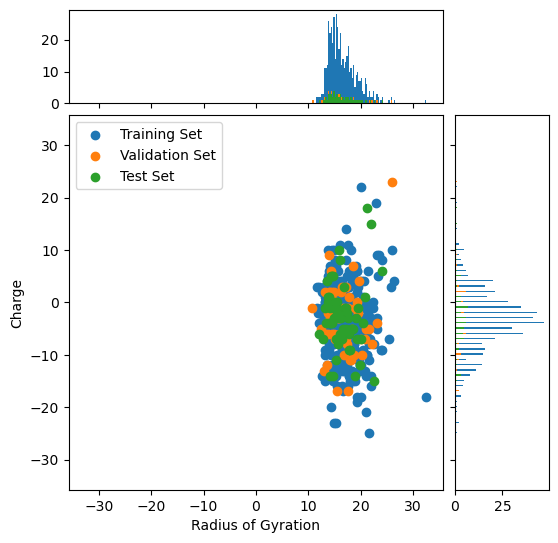

In [13]:
### Based on the plt tutorials

# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax.set_xlabel("Radius of Gyration")
ax.set_ylabel("Charge")
# Draw the scatter plot and marginals.
scatter_hist(train_data["Radius of Gyration"], train_data["Charge"], ax, ax_histx, ax_histy, label = "Training Set")
scatter_hist(valid_data["Radius of Gyration"], valid_data["Charge"], ax, ax_histx, ax_histy, label = "Validation Set")
scatter_hist(test_data["Radius of Gyration"], test_data["Charge"], ax, ax_histx, ax_histy, label = "Test Set")
ax.legend()

# Adding Gaussian Circles


plt.show()

# Sort Torch Input and Output

In [8]:
import shutil

In [9]:
for i in train_data["Name"]:
    i = i[:-4]
    shutil.copy(f"simpleTorchInputs/{i}.pt", f"trainInput")
    shutil.copy(f"torchOutput/{i}_output.pt", f"trainOutput")

for i in valid_data["Name"]:
    i = i[:-4]
    shutil.copy(f"simpleTorchInputs/{i}.pt", f"validationInput")
    shutil.copy(f"torchOutput/{i}_output.pt", f"validationOutput")

for i in test_data["Name"]:
    i = i[:-4]
    shutil.copy(f"simpleTorchInputs/{i}.pt", f"testInput")
    shutil.copy(f"torchOutput/{i}_output.pt", f"testOutput")

# Distribution Superfigure

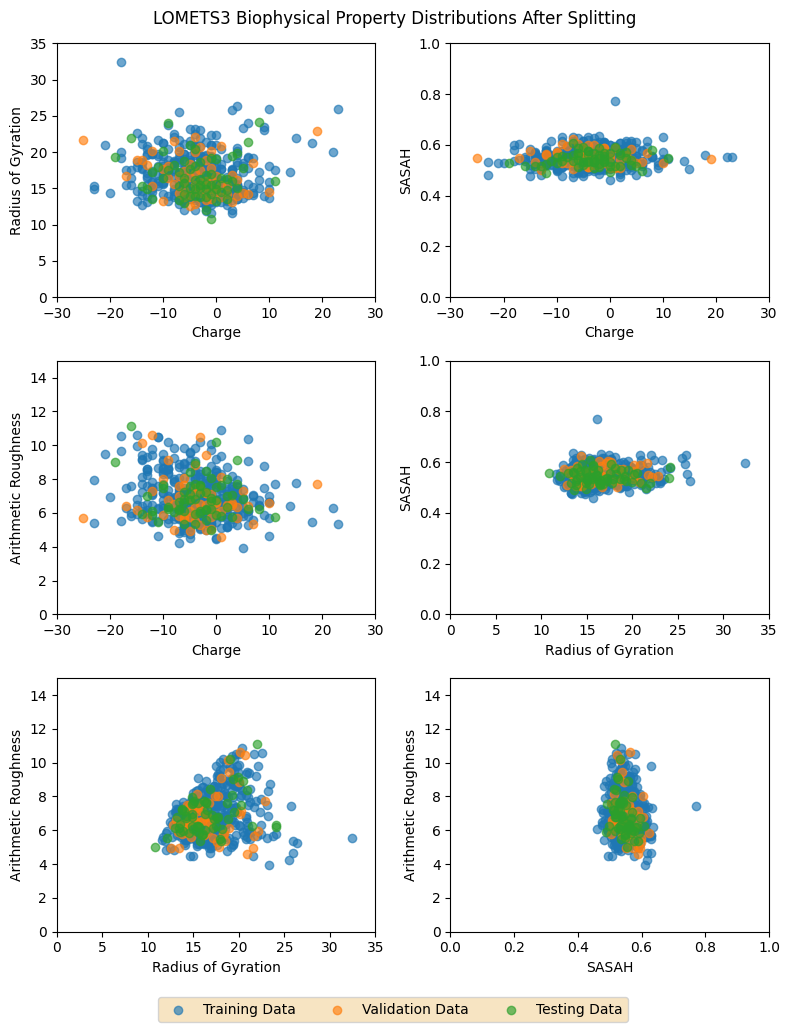

In [10]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize = [8, 10], tight_layout = True)
fig.suptitle("LOMETS3 Biophysical Property Distributions After Splitting")
labels = ["Training Data", "Validation Data", "Testing Data"]

tr_label = ax1.scatter(train_data["Charge"], train_data["Radius of Gyration"], label = labels[0], alpha = 0.65)
val_label = ax1.scatter(valid_data["Charge"], valid_data["Radius of Gyration"], label = labels[1], alpha = 0.65)
te_label =ax1.scatter(test_data["Charge"], test_data["Radius of Gyration"], label = labels[2], alpha = 0.65)
ax1.set_xlabel("Charge")
ax1.set_ylabel("Radius of Gyration")
ax1.set_xlim(-30,30)
ax1.set_ylim(0,35)

ax2.scatter(train_data["Charge"], train_data["SASAH"], label = labels[0], alpha = 0.65)
ax2.scatter(valid_data["Charge"], valid_data["SASAH"], label = labels[1], alpha = 0.65)
ax2.scatter(test_data["Charge"], test_data["SASAH"], label = labels[2], alpha = 0.65)
ax2.set_xlabel("Charge")
ax2.set_ylabel("SASAH")
ax2.set_xlim(-30,30)
ax2.set_ylim(0, 1)

ax3.scatter(train_data["Charge"], train_data["Arithmetic Roughness"], label = labels[0], alpha = 0.65)
ax3.scatter(valid_data["Charge"], valid_data["Arithmetic Roughness"], label = labels[1], alpha = 0.65)
ax3.scatter(test_data["Charge"], test_data["Arithmetic Roughness"], label = labels[2], alpha = 0.65)
ax3.set_xlabel("Charge")
ax3.set_ylabel("Arithmetic Roughness")
ax3.set_xlim(-30,30)
ax3.set_ylim(0, 15)

ax4.scatter(train_data["Radius of Gyration"], train_data["SASAH"], label = labels[0], alpha = 0.65)
ax4.scatter(valid_data["Radius of Gyration"], valid_data["SASAH"], label = labels[1], alpha = 0.65)
ax4.scatter(test_data["Radius of Gyration"], test_data["SASAH"], label = labels[2], alpha = 0.65)
ax4.set_xlabel("Radius of Gyration")
ax4.set_ylabel("SASAH")
ax4.set_xlim(0, 35)
ax4.set_ylim(0, 1)

ax5.scatter(train_data["Radius of Gyration"], train_data["Arithmetic Roughness"], label = labels[0], alpha = 0.65)
ax5.scatter(valid_data["Radius of Gyration"], valid_data["Arithmetic Roughness"], label = labels[1], alpha = 0.65)
ax5.scatter(test_data["Radius of Gyration"], test_data["Arithmetic Roughness"], label = labels[2], alpha = 0.65)
ax5.set_xlabel("Radius of Gyration")
ax5.set_ylabel("Arithmetic Roughness")
ax5.set_xlim(0, 35)
ax5.set_ylim(0, 15)

ax6.scatter(train_data["SASAH"], train_data["Arithmetic Roughness"], label = labels[0], alpha = 0.65)
ax6.scatter(valid_data["SASAH"], valid_data["Arithmetic Roughness"], label = labels[1], alpha = 0.65)
ax6.scatter(test_data["SASAH"], test_data["Arithmetic Roughness"], label = labels[2], alpha = 0.65)
ax6.set_xlabel("SASAH")
ax6.set_ylabel("Arithmetic Roughness")
ax6.set_xlim(0,1)
ax6.set_ylim(0, 15)

fig.legend([tr_label, val_label, te_label],
           labels,
           bbox_to_anchor=(0.8,0),
           ncols = 3,
           facecolor = "wheat")

plt.savefig("Lomets3SplitDataset.png", dpi = 400, bbox_inches = "tight")
plt.show()